## Analiza przejezdnosci pod wzgledem lasow dla 30t pojazdu

Poniżej znajduje sie kod umozliwiajacy wygenerowanie za pomoca kilku metodyk obszarow nierzejezdnych dla pojazdu o okreslonej masie.


In [ ]:
# importuje biblioteki niezbedne do uruchomienia notatnika
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# wczytuje testowo geodatafrarme (dane przestrzenne)
path_25k: str = 'data/Polska podział arkuszowy 25k/25k_all.shp'
gdf_godla: gpd.GeoDataFrame = gpd.read_file(path_25k)
gdf_godla

In [ ]:
#kontrolne rysowanko z godla

fig, ax = plt.subplots(figsize = (10,10))
gdf_godla.plot(ax=ax, color = 'gray')

In [ ]:
# kontrola pliku z vmap

path_vmap_shp_file: str = 'data/vmap/AEC015_clip.shp'
gdf_lasy = gpd.read_file(path_vmap_shp_file)
gdf_lasy

In [ ]:
#kontrolne rysowanko gdf z danymi o lasach

fig, ax = plt.subplots(figsize = (15,15))
gdf_lasy.plot(ax=ax, color = 'green', edgecolor = 'black')


### Odliczanie po plikach shp i intersekcja dla wybranego  arkusza
#### Opis czynosci wykonanych w kodzie
1. Tworze liste plikow z shp
2. Tworze z godla gdf
3. Robie petle po obiektach gdf (godlo)
        - Tworze z listy plikow gdf

In [28]:
lista_plikow_vmap_shp: list = [{"patch": f'data/vmap/{file}', 'file_name':file} for file in os.listdir('data/vmap') if file.endswith('shp')]
# jest to lista slownikow zawierajacych sciezke do pliku na dysku oraz nazwe pliku ktory bedziemy mogili przetwarzac

In [ ]:
# for item in lista_plikow_vmap_shp:
#    tmp_file_vmap = gpd.read_file(item['path'], encoding="utf-16")   for idx, row in gdf_godla.iterrows():
#        tmp_gdf_of_single_25k_sheet = gdf_godla.iloc[[idx]]
#
#        tmp_instersekcja = gpd.overlay(tmp_gdf_of_single_25k_sheet, tmp_file_vmap, how='intersection')
#        if not tmp_instersekcja.empty:
#            tmp_instersekcja.to_file(f'output/godlo_{idx}_{item['file_name']}.gpkg', driver='GPKG')

### Metoda analizy nr I klasyfikacji lasow pod wzgledem przejezdnosci

#### Klasyfikacja wg. zalozen NO-06-015
##### Założenia:
- <strong>Przejezdne:</strong> drzewa o srednicy mniejszej niz 5 cm lub w odstepach wiekszych niz 5m.
- <strong>Wolno-przejezdne:</strong> drzewa o srednicy wiekszej niz 5 cm i mniejszej niez 15 cm lub w odstepach mniejszych niz 5m.
- <strong>Nie-przejezdne:</strong> drzewa o srednicy wiekszej niz 15 cm lub w odstepach mniejszych niz 5m.



In [ ]:
gdf_lasy.columns

In [268]:
# zeby filtrowac tabela[warunek]  warunek = (tabela [kolumna] == 5) & (tabela[kolumna] > 5)
gdf_lasy_go = gdf_lasy[(gdf_lasy['SDS']<0.05)|(gdf_lasy['TSC']>5)]
len(gdf_lasy_go)

12251

### Lasy przejezdne

In [ ]:
#kontrolne rysowanko gdf z danymi o lasach

fig, ax = plt.subplots(figsize = (15,15))
gdf_lasy_go.plot(ax=ax, color = 'green')

### Lasy wolno przejezdne

In [39]:
gdf_lasy_slow_go = gdf_lasy[(gdf_lasy['SDS']<0.15)|(gdf_lasy['TSC']<5)]
len(gdf_lasy_slow_go)

13327

In [ ]:
#kontrolne rysowanko gdf z danymi o lasach

fig, ax = plt.subplots(figsize = (15,15))
gdf_lasy_go.plot(ax=ax, color = 'yellow')

### Lasy nieprzejezdne

In [43]:
gdf_lasy_no_go = gdf_lasy[(gdf_lasy['SDS']>0.15) & (gdf_lasy['TSC']<5)]
len(gdf_lasy_no_go)

1016

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
gdf_lasy_no_go.plot(ax=ax, color = 'red')

### Zbiorcza mapa

In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
gdf_lasy_go.plot(ax=ax, color = 'green')
gdf_lasy_go.plot(ax=ax, color = 'yellow')
gdf_lasy_no_go.plot(ax=ax, color = 'red')

### Metoda analizy nr II klasyfikacji lasow pod wzgledem przejezdnosci

#### Klasyfikacja wg. zalozen Warunki terenowe i klimatyczne Polski; Lasy Warszawa 1981 r
##### Założenia:
- <strong>Przejezdne:</strong> kompleksy lesne tam gdzie masa pojazdu jest wieksza od piersnicy podzielonej na 2
- <strong>Wolno-przejezdne:</strong> trzykrotnosc piersnicy mniejsza od polowy masy pojazu i wieksza od powyzszego
- <strong>Nie-przejezdne:</strong> wieksze niz trzykrotnosc piersnicy mniejsza niz polowa masy pojazdu
#### Masa Leopard 2: 69t
#### Masa T-72: 41t

In [48]:
m_L2 = 69
m_T72 = 41

### Lasy przejezdne

In [265]:
gdf_lasy_go_Leo = gdf_lasy[(gdf_lasy['SDS']/200) < m_L2]
len(gdf_lasy_go_Leo)
len(gdf_lasy)

13406

In [187]:

len(gdf_lasy)

13406

In [264]:
gdf_lasy_go_T72 = gdf_lasy[(gdf_lasy['SDS']/200) < m_T72]
len(gdf_lasy_go_T72)

13406

### Lasy wolno przejezdne

In [282]:
gdf_lasy_slow_go_Leo = gdf_lasy[(300*gdf_lasy['SDS'] < m_L2/2) ]
len(gdf_lasy_slow_go_Leo)

12311

In [261]:
gdf_lasy_slow_go_T72 = gdf_lasy[(300*gdf_lasy['SDS'] < m_T72/2) < ((gdf_lasy['SDS']/2) < m_T72)]
len(gdf_lasy_slow_go_T72)

1158

### Lasy nieprzejezdne

In [283]:
#gdf_lasy_no_go_Leo = gdf_lasy[(gdf_lasy["SDS"] < m_L2/2) & (m_L2 < gdf_lasy["SDS"]* 300)]
gdf_lasy_no_go_Leo = gdf_lasy[(300*gdf_lasy['SDS']) > (m_L2/2)]
len(gdf_lasy_no_go_Leo)

1095

In [260]:
gdf_lasy_no_go_T72 = gdf_lasy[(gdf_lasy["SDS"] < m_T72/2) & (m_L2 < gdf_lasy["SDS"]*100 * 3)]
len(gdf_lasy_no_go_T72)

278

### Zbiorcza mapa
#### Leopard 2

<Axes: >

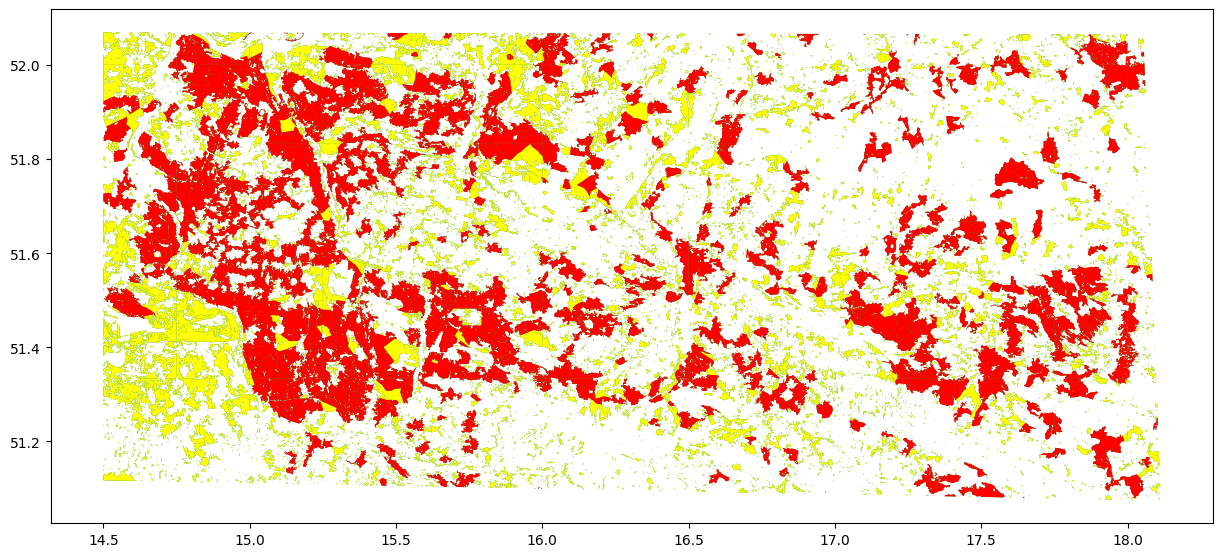

In [284]:
fig, ax = plt.subplots(figsize = (15,15))
gdf_lasy_go_Leo.plot(ax=ax, color = 'green')
gdf_lasy_slow_go_Leo.plot(ax=ax, color = 'yellow')
gdf_lasy_no_go_Leo.plot(ax=ax, color = 'red')

#### T-72

<Axes: >

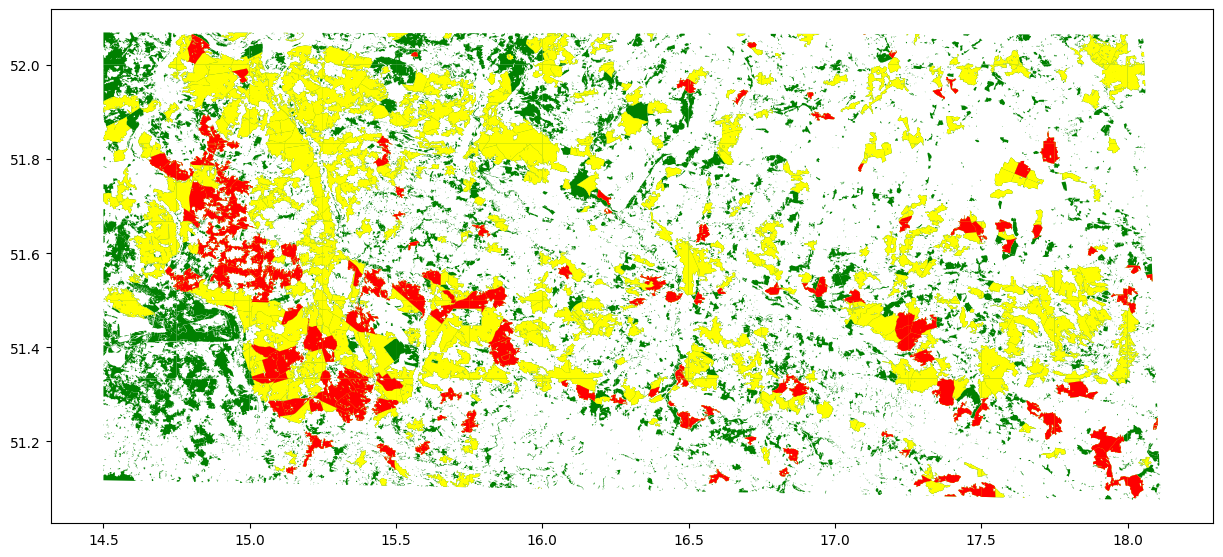

In [240]:
fig, ax = plt.subplots(figsize = (15,15))
gdf_lasy_go_T72.plot(ax=ax, color = 'green')
gdf_lasy_slow_go_T72.plot(ax=ax, color = 'yellow')
gdf_lasy_no_go_T72.plot(ax=ax, color = 'red')